# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#API call url
weather_url = 'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID='

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['bubaque', 'sharan', 'vaini', 'hithadhoo', 'mga', 'mullaitivu', 'kodiak', 'atuona', 'san cristobal', 'qaanaaq', 'margate', 'victoria', 'hilo', 'dayong', 'georgetown', 'chokurdakh', 'new norfolk', 'puerto ayora', 'rikitea', 'vaitupu', 'ponta do sol', 'malakal', 'acapulco', 'jamestown', 'chuy', 'port alfred', 'mandera', 'acuna', 'banjar', 'dakar', 'barrow', 'ankang', 'punta arenas', 'mataura', 'verkhoyansk', 'mansfield', 'goundam', 'dwarka', 'san patricio', 'tautira', 'pochutla', 'bluff', 'upernavik', 'avarua', 'vuktyl', 'saleaula', 'busselton', 'belushya guba', 'walvis bay', 'lebu', 'mar del plata', 'salalah', 'ushuaia', 'henties bay', 'sechura', 'saskylakh', 'kargasok', 'taoudenni', 'provideniya', 'dzilam gonzalez', 'hamilton', 'kerman', 'rio cauto', 'yellowknife', 'khash', 'thompson', 'clyde river', 'burgos', 'constitucion', 'taolanaro', 'zhigansk', 'port arthur', 'pocone', 'pevek', 'aklavik', 'drexel heights', 'olbia', 'klaksvik', 'sao filipe', 'longyearbyen', 'sovetskiy', 'saint ge

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrevial\n--------------------------------------")

api_url = 'http://api.openweathermap.org/data/2.5/weather?appid=' +api_key +'&q='
data = {"City ID": 1,"City name": "",
         "City longitude": "","City latitude": "",
         "Temperature": "",
         "Humidity": "", 
         "Cloud coverage": "",
         "Wind Speed": "",
         "City Country":"",
         "City Datetime":""}
citiDF = pd.DataFrame(data, index = [0])
for city in cities:
    try:
        query_url = api_url + city.capitalize()
        #print(query_url)
        weather_check = requests.get(query_url)
        #print(weather_check)
        weather_response = weather_check.json()
        #print(weather_response)
        print(weather_response["id"], weather_response["name"])
        new_row = {"City ID": weather_response["id"],"City name":weather_response["name"],
         "City longitude": weather_response["coord"]["lon"],"City latitude": weather_response["coord"]["lat"],
         "Temperature": weather_response["main"]["temp"],
         "Humidity":weather_response["main"]["humidity"], 
         "Cloud coverage": weather_response["clouds"]["all"],
         "Wind Speed": weather_response["wind"]["speed"],
         "City Country": weather_response["sys"]["country"],
         "City Datetime": weather_response["dt"]}
        citiDF = citiDF.append(new_row, ignore_index=True)
    except:
        print(city + " wasn't found")
        
citiDF = citiDF.drop([0])

Beginning Data Retrevial
--------------------------------------
2374583 Bubaque
1120879 Sharan
1273574 Vaini
1282256 Hithadhoo
527220 Mga
mullaitivu wasn't found
4407665 Kodiak
4020109 Atuona
3609418 San Cristobal
3831208 Qaanaaq
2158744 Margate
1733782 Victoria
5855927 Hilo
1789289 Dayong
3378644 Georgetown
2126123 Chokurdakh
2155415 New Norfolk
3652764 Puerto Ayora
4030556 Rikitea
vaitupu wasn't found
3453439 Ponta do Sol
malakal wasn't found
3533462 Acapulco
2069194 Jamestown
3443061 Chuy
964432 Port Alfred
187896 Mandera
acuna wasn't found
1650233 Banjar
2253354 Dakar
3833859 Barrow
1789065 Ankang
3874787 Punta Arenas
6201424 Mataura
2013465 Verkhoyansk
2643097 Mansfield
2456917 Goundam
1273294 Dwarka
3437029 San Patricio
4033557 Tautira
3517970 Pochutla
2175403 Bluff
3418910 Upernavik
4035715 Avarua
470905 Vuktyl
saleaula wasn't found
2075265 Busselton
belushya guba wasn't found
3359638 Walvis Bay
344979 Lebu
3863379 Mar del Plata
286621 Salalah
3833367 Ushuaia
3356832 Henties Bay

5294810 Flagstaff
khonuu wasn't found
4036284 Alofi
1510998 Balakhta
3991347 Puerto Penasco
1625929 Sungaipenuh
3838859 Rio Gallegos
1625812 Batan
3386177 Trairi
1083239 Ambatofinandrahana
3816362 Benemerito de las Americas
3896218 Castro
1024312 Mocuba
2192362 Christchurch
3461370 Imbituba
formoso do araguaia wasn't found
zhuozhou wasn't found
6065592 Maple Creek
4088628 Saraland
2025241 Churapcha
57000 Hobyo
2225940 Yatou
3696372 Huari
590447 Tondi
2037485 Erenhot
2077895 Alice Springs
1648759 Bima
doctor pedro p. pena wasn't found
3145614 Mo i Rana
2548885 Fez
1039536 Maxixe
4562996 Cabo Rojo
779330 Kautokeino
3906466 Riberalta
1496511 Novyy Urengoy
2619537 Hvide Sande
3164565 Vila
1808106 Hongjiang
5961417 Husavik
6325494 Quebec
779261 Kjollefjord
gurupa wasn't found
felidhoo wasn't found
3372760 Praia da Vitoria
3412093 Vestmannaeyjar
3932145 Pisco
4089114 Selma
6145890 Shelburne
97783 Bayji
1488167 Ust-Koksa
535839 Leshukonskoye
698921 Novi Troyany
5861897 Fairbanks
6620339 Karra

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
citiDF.to_csv(r'WeatherData.csv')

In [6]:
citiDF.head()

,City ID,City name,City longitude,City latitude,Max Temperature,Humidity,Cloud coverage,Wind Speed,City Country,City Datetime,Temperature
1,2374583,Bubaque,-15.83,11.28,NaN,50,0,5.53,GW,1.577672e+09,299.78
2,1120879,Sharan,68.78,33.15,NaN,37,0,1.22,AF,1.577672e+09,270.25
3,1273574,Vaini,74.49,15.34,NaN,93,5,2.9,IN,1.577672e+09,290.15
4,1282256,Hithadhoo,73.08,-0.6,NaN,75,100,3.85,MV,1.577672e+09,301.45
5,527220,Mga,31.06,59.76,NaN,90,90,4,RU,1.577672e+09,273.46


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

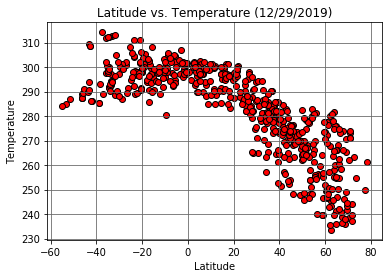

In [8]:
plt.scatter(citiDF["City latitude"], citiDF["Temperature"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Temperature (12/29/2019)")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Temperature.jpg')

#### Latitude vs. Humidity Plot

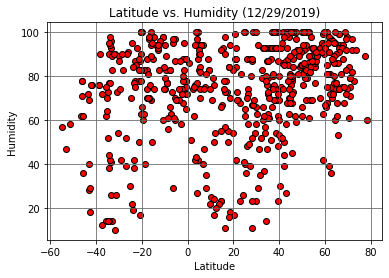

In [10]:
plt.scatter(citiDF["City latitude"], citiDF["Humidity"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Humidity (12/29/2019)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Humidity.jpg')

#### Latitude vs. Cloudiness Plot

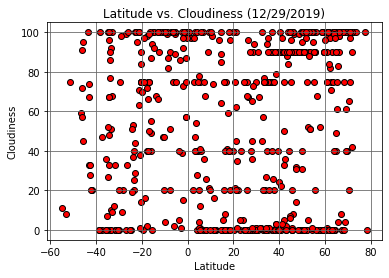

In [11]:
plt.scatter(citiDF["City latitude"], citiDF["Cloud coverage"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Cloudiness (12/29/2019)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Cloudiness.jpg')

#### Latitude vs. Wind Speed Plot

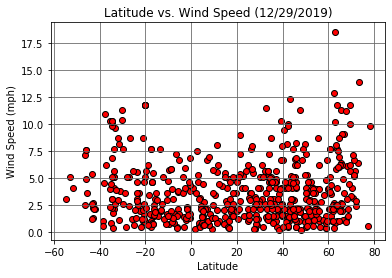

In [12]:
plt.scatter(citiDF["City latitude"], citiDF["Wind Speed"], marker="o", facecolors="red", edgecolors="black")
plt.title("Latitude vs. Wind Speed (12/29/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.savefig('Latitude vs. Wind Speed.jpg')